# Определение тарифа для телеком компании

В нашем распоряжении  данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import math
from scipy import stats as st

Откроем и изучим данные:

In [2]:
df = pd.read_csv('/datasets/calls.csv', sep='\t')

In [3]:
calls = pd.read_csv('/datasets/calls.csv')

In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
calls.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [7]:
def uni(data):
    return len(data['user_id'].unique())
uni(calls)

492

In [8]:
len(calls[calls['duration'] == 0])/len(calls)

0.19551644316336553

В данных о звонках пропущенных данных нет, 20% звонков с нулевыми значениями, надо решить, что с ними делать  
Необходимо  будет изменить тип данных в колонке с датой  
492 клиента делали звонки

In [9]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
internet.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [12]:
uni(internet)

497

In [13]:
len(internet[internet['mb_used'] == 0])/len(internet)

0.13118155773916304

В данных о интернет трафике пропущенных данных нет, 13% с нулевыми значениями  
Необходимо  будет изменить тип данных в колонке с датой  
497 клиента пользовались интернетом  

In [14]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
messages.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


In [17]:
uni(messages)

426

В данных об смс пропущенных данных нет  
Необходимо  будет изменить тип данных в колонке с датой  
426 клиента отправляли смс

In [18]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [19]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [20]:
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [22]:
users.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [23]:
uni(users)

500

Пропущенных значений в данных о пользователях нет.
38 клиентов прекратили пользоваться тарифом
Также необходимо поменять тип данных в 2 столбцах на datetime

### Вывод

У нас в распоряжении 5 таблиц с данными о 500 клиентах из разных регионов России, их звонках, использовании интернета, сообщениях и тарифах.  
По всем столбцам с датой необходимо изменить тип данных.  
Надо проанализировать нулевые значения в данных о звонках и принять решение.  

## Предобработка данных

Изменим типы данных в таблицах

In [24]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

Создадим в таблице calls 2 столбца с округленными данными по длительности исходя из 2 предположений: 0 - это пропущенные вызовы, и должны остаться нулями, 0 - вызов который будет тарифицироваться как 1 минута, чтобы оценить разницу

In [25]:
calls['duration_ceil'] = calls['duration'].apply(np.ceil)

In [26]:
def qwe(i):
    if i == 0: return 1
    return i

In [27]:
calls['test'] = calls['duration_ceil'].apply(qwe)


In [28]:
calls.head()

,id,call_date,duration,user_id,duration_ceil,test
0,1000_0,2018-07-25,0.00,1000,0.0,1.0
1,1000_1,2018-08-17,0.00,1000,0.0,1.0
2,1000_2,2018-06-11,2.85,1000,3.0,3.0
3,1000_3,2018-09-21,13.80,1000,14.0,14.0
4,1000_4,2018-12-15,5.18,1000,6.0,6.0


In [29]:
rt = calls.groupby("user_id")['duration_ceil', 'test'].sum().reset_index()
rt

,user_id,duration_ceil,test
0,1000,2566.0,2641.0
1,1001,844.0,874.0
2,1002,1517.0,1561.0
3,1003,3822.0,3914.0
4,1004,987.0,1024.0
...,...,...,...
487,1495,3920.0,4019.0
488,1496,5984.0,6145.0
489,1497,1406.0,1451.0
490,1498,1293.0,1327.0


In [30]:
rt.columns = ['user_id','duration_ceil', 'test']

In [31]:
rt['difference'] = rt['test'] / rt['duration_ceil'] - 1
rt

,user_id,duration_ceil,test,difference
0,1000,2566.0,2641.0,0.029228
1,1001,844.0,874.0,0.035545
2,1002,1517.0,1561.0,0.029005
3,1003,3822.0,3914.0,0.024071
4,1004,987.0,1024.0,0.037487
...,...,...,...,...
487,1495,3920.0,4019.0,0.025255
488,1496,5984.0,6145.0,0.026905
489,1497,1406.0,1451.0,0.032006
490,1498,1293.0,1327.0,0.026295


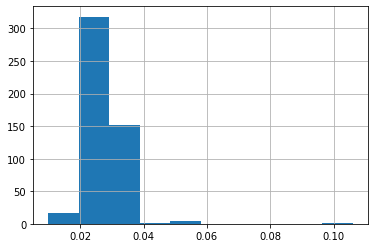

In [32]:
rt[rt['difference'] > 0]['difference'].hist();

Количество звонков с 0 длительностью около 20%, если предположить, что эти вызовы учтутся как 1 минута, то общая длительность разговоров каждого конкретного абонента увеличится всего на 3%  

Мы видим, что современные технические возможности позволяют фиксировать звонки длительностью 1/100 минуты  

Я знаю из ежемесячной выписки своего оператора, что я часто не дозваниваюсь, и эти звонки также фиксируются как нулевые  

Исходя из всего этого, мы не будем учитывать эти звонки, будем считать, что соединения не было.  
В реальной ситуации мы смогли бы уточнить информацию у коллег  
Если мое предположение неверно, то его влияние на результат анализа не должно быть существенным.  

### Вывод

Мы изменили тип данных в столбцах с датой.  
Проанализировали и приняли решение не оставить звонки с нулевой длительностью нулями.

## Создание сводной таблицы

### Подготовка сводной таблицы 

Подготовим таблицы к объединению

Для анализа нам нужно сгруппировать таблицы по клиентам и датам.

Посмотрим какой тут промежуток вермени:

In [33]:
users['reg_date'].min()

Timestamp('2018-01-01 00:00:00')

In [34]:
users['reg_date'].max()

Timestamp('2018-12-31 00:00:00')

У нас весь 2018 год. Теперь я хочу сделать отчет по продажам на каждый месяц.

In [35]:
users['reg_month'] = users['reg_date'].values.astype('datetime64[M]')

In [36]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-01
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-01
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,2018-08-01
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,2018-01-01
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,2018-10-01
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-07-01


Таблицу users  привели к нужному формату: 1 строка - 1 клиент - 1 месяц

Сгенерируем таблицу где на каждого юзера будет каждый месяц

In [37]:
min_month = calls['call_date'].min()

In [38]:
max_month = calls['call_date'].max()

In [39]:
max_month

Timestamp('2018-12-31 00:00:00')

In [40]:
min_month

Timestamp('2018-01-01 00:00:00')

In [41]:
pd.date_range(min_month,max_month,freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [42]:
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))

In [43]:
dr

,0
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


In [44]:
dr.columns = ['month']

Сделаем объединение

In [45]:
len(users)*len(dr)

6000

6000 строк должно получится в таблице

In [46]:
dr['key'] = 1
users['key'] = 1

In [47]:
df = dr.merge(users,on='key')

In [48]:
df.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,2018-01-01,1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
1,2018-01-01,1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01
2,2018-01-01,1,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-01
3,2018-01-01,1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-01
4,2018-01-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01


In [49]:
len(df)

6000

Как и ожидали. Теперь у нас есть строка каждого клиента с каждым месяцем.
Но у нас есть клиенты, которые зарегистрировались позже января. Лишние строки можно удалить:

In [50]:
len(df[df['month']>=df['reg_month']])

3259

In [51]:
df = df[df['month']>=df['reg_month']]

Посмотрим на отдельного клиента:

In [52]:
df[df['user_id'] == 1004]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
2004,2018-05-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01
2504,2018-06-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01
3004,2018-07-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01
3504,2018-08-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01
4004,2018-09-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01
4504,2018-10-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01
5004,2018-11-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01
5504,2018-12-01,1,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01


In [53]:
df[df['user_id'] == 1010]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
3510,2018-08-01,1,1010,26,NaT,Тюмень,Эдуард,Кононов,2018-08-05,smart,2018-08-01
4010,2018-09-01,1,1010,26,NaT,Тюмень,Эдуард,Кононов,2018-08-05,smart,2018-08-01
4510,2018-10-01,1,1010,26,NaT,Тюмень,Эдуард,Кононов,2018-08-05,smart,2018-08-01
5010,2018-11-01,1,1010,26,NaT,Тюмень,Эдуард,Кононов,2018-08-05,smart,2018-08-01
5510,2018-12-01,1,1010,26,NaT,Тюмень,Эдуард,Кононов,2018-08-05,smart,2018-08-01


Видим, что наша логика работает

### Присоединение данных о звонках

Посчитаем суммарную длительность звонков на каждый месяц и их количество:

In [54]:
calls.head()

,id,call_date,duration,user_id,duration_ceil,test
0,1000_0,2018-07-25,0.00,1000,0.0,1.0
1,1000_1,2018-08-17,0.00,1000,0.0,1.0
2,1000_2,2018-06-11,2.85,1000,3.0,3.0
3,1000_3,2018-09-21,13.80,1000,14.0,14.0
4,1000_4,2018-12-15,5.18,1000,6.0,6.0


In [55]:
calls = calls.query('duration > 0')

In [56]:
calls

,id,call_date,duration,user_id,duration_ceil,test
2,1000_2,2018-06-11,2.85,1000,3.0,3.0
3,1000_3,2018-09-21,13.80,1000,14.0,14.0
4,1000_4,2018-12-15,5.18,1000,6.0,6.0
7,1000_7,2018-08-22,18.31,1000,19.0,19.0
8,1000_8,2018-09-15,18.44,1000,19.0,19.0
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,1.0,1.0
202603,1499_216,2018-10-18,18.83,1499,19.0,19.0
202604,1499_217,2018-11-10,10.81,1499,11.0,11.0
202605,1499_218,2018-10-06,4.27,1499,5.0,5.0


In [57]:
calls['month'] = calls['call_date'].values.astype('datetime64[M]')

In [58]:
calls_month = calls.groupby(['user_id','month'])[['duration_ceil']].agg(['count','sum']).reset_index()

In [59]:
calls_month

user_id      month duration_ceil       
                                count    sum
0       1000 2018-05-01            17  159.0
1       1000 2018-06-01            28  172.0
2       1000 2018-07-01            41  340.0
3       1000 2018-08-01            42  408.0
4       1000 2018-09-01            46  466.0
...      ...        ...           ...    ...
3163    1498 2018-10-01            30  247.0
3164    1499 2018-09-01             8   70.0
3165    1499 2018-10-01            44  449.0
3166    1499 2018-11-01            62  612.0
3167    1499 2018-12-01            56  492.0

[3168 rows x 4 columns]

In [60]:
calls_month.columns = ['user_id','month', 'calls','duration']

In [61]:
calls_month

,user_id,month,calls,duration
0,1000,2018-05-01,17,159.0
1,1000,2018-06-01,28,172.0
2,1000,2018-07-01,41,340.0
3,1000,2018-08-01,42,408.0
4,1000,2018-09-01,46,466.0
...,...,...,...,...
3163,1498,2018-10-01,30,247.0
3164,1499,2018-09-01,8,70.0
3165,1499,2018-10-01,44,449.0
3166,1499,2018-11-01,62,612.0


In [62]:
calls['duration_ceil'].sum()

1450301.0

In [63]:
calls_month['duration'].sum()

1450301.0

цифры сходятся

In [64]:
df = df.merge(calls_month,how='left',on=['user_id','month'])

In [65]:
df

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,calls,duration
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,11.0,95.0
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01,44.0,380.0
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01,1.0,9.0
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01,47.0,551.0
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,18.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-12-01,1,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,2018-08-01,120.0,1031.0
3255,2018-12-01,1,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,2018-01-01,65.0,518.0
3256,2018-12-01,1,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,2018-10-01,58.0,545.0
3257,2018-12-01,1,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-07-01,NaN,NaN


Проверим результат:

In [66]:
calls['duration_ceil'].sum()

1450301.0

In [67]:
df['duration'].sum()

1450301.0

Посмотрим на отдельного клиента:

In [68]:
df[df['user_id'] == 1246]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,calls,duration
1673,2018-09-01,1,1246,27,NaT,Санкт-Петербург,Марта,Ситникова,2018-09-26,smart,2018-09-01,8.0,70.0
2074,2018-10-01,1,1246,27,NaT,Санкт-Петербург,Марта,Ситникова,2018-09-26,smart,2018-09-01,43.0,414.0
2520,2018-11-01,1,1246,27,NaT,Санкт-Петербург,Марта,Ситникова,2018-09-26,smart,2018-09-01,34.0,314.0
3005,2018-12-01,1,1246,27,NaT,Санкт-Петербург,Марта,Ситникова,2018-09-26,smart,2018-09-01,39.0,350.0


Все хорошо


Заполним пропуски нулями

In [69]:
df['duration'].isna().sum()
df['calls'].isna().sum()

91

In [70]:
df['duration'] = df['duration'].fillna(0)
df['calls'] = df['calls'].fillna(0)

### Присоединение данных о трафике

Округлим мегабайты в большую сторону в соответствии с тарифной политикой компании

In [71]:
internet['mb_ceil'] = internet['mb_used'].apply(np.ceil)

Добавил столбец с месяцем

In [72]:
internet['month'] = internet['session_date'].values.astype('datetime64[M]')

In [73]:
internet_month = (internet.groupby(['user_id','month'])[['mb_ceil']]
                  .agg(['sum'])
                  .reset_index()
                 )

In [74]:
internet_month

,user_id,month,mb_ceil
,,,sum
0,1000,2018-05-01,2256.0
1,1000,2018-06-01,23257.0
2,1000,2018-07-01,14016.0
3,1000,2018-08-01,14070.0
4,1000,2018-09-01,14581.0
...,...,...,...
3198,1498,2018-10-01,20604.0
3199,1499,2018-09-01,1848.0
3200,1499,2018-10-01,17809.0


In [75]:
internet_month.columns = ['user_id','month','mb_used']

In [76]:
internet_month

,user_id,month,mb_used
0,1000,2018-05-01,2256.0
1,1000,2018-06-01,23257.0
2,1000,2018-07-01,14016.0
3,1000,2018-08-01,14070.0
4,1000,2018-09-01,14581.0
...,...,...,...
3198,1498,2018-10-01,20604.0
3199,1499,2018-09-01,1848.0
3200,1499,2018-10-01,17809.0
3201,1499,2018-11-01,17984.0


In [77]:
internet['mb_ceil'].sum()

55369459.0

In [78]:
internet_month['mb_used'].sum()

55369459.0

Сходится

Присоединяем

In [79]:
df = df.merge(internet_month,how='left',on=['user_id','month'])

In [80]:
df

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,calls,duration,mb_used
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,11.0,95.0,2730.0
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01,44.0,380.0,24147.0
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01,1.0,9.0,2348.0
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01,47.0,551.0,17111.0
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,18.0,194.0,15622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-12-01,1,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,2018-08-01,120.0,1031.0,23450.0
3255,2018-12-01,1,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,2018-01-01,65.0,518.0,20757.0
3256,2018-12-01,1,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,2018-10-01,58.0,545.0,19940.0
3257,2018-12-01,1,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-07-01,0.0,0.0,NaN


Проверим

In [81]:
internet['mb_ceil'].sum()

55369459.0

In [82]:
df['mb_used'].sum()

55369459.0

сходится

In [83]:
df['mb_used'].isna().sum()

56

In [84]:
df['mb_used'] = df['mb_used'].fillna(0)

In [85]:
df['mb_used'].isna().sum()

0

### Присоединение данных о сообщениях

In [86]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [87]:
messages['month'] = messages['message_date'].values.astype('datetime64[M]')

In [88]:
messages_month = messages.groupby(['user_id','month'])[['user_id']].agg(['count']).reset_index()

In [89]:
messages_month

,user_id,month,user_id
,,,count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48


In [90]:
messages_month.columns = ['user_id','month','messages']

In [91]:
messages_month

,user_id,month,messages
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


In [92]:
messages.count()

id              123036
message_date    123036
user_id         123036
month           123036
dtype: int64

In [93]:
messages_month['messages'].sum()

123036

Сходится

Присоединяем

In [94]:
df = df.merge(messages_month,how='left',on=['user_id','month'])

In [95]:
df

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,calls,duration,mb_used,messages
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,11.0,95.0,2730.0,7.0
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01,44.0,380.0,24147.0,38.0
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01,1.0,9.0,2348.0,5.0
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01,47.0,551.0,17111.0,30.0
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,18.0,194.0,15622.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-12-01,1,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,2018-08-01,120.0,1031.0,23450.0,84.0
3255,2018-12-01,1,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,2018-01-01,65.0,518.0,20757.0,51.0
3256,2018-12-01,1,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,2018-10-01,58.0,545.0,19940.0,17.0
3257,2018-12-01,1,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,2018-07-01,0.0,0.0,0.0,NaN


In [96]:
messages['month'].count()

123036

In [97]:
df['messages'].sum()

123036.0

Также посмотрим на отдельного клиента.

In [98]:
df[df['user_id'] == 1046]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,calls,duration,mb_used,messages
1184,2018-08-01,1,1046,72,NaT,Тула,Екатерина,Александрова,2018-08-20,smart,2018-08-01,22.0,228.0,7645.0,13.0
1527,2018-09-01,1,1046,72,NaT,Тула,Екатерина,Александрова,2018-08-20,smart,2018-08-01,56.0,504.0,15910.0,34.0
1911,2018-10-01,1,1046,72,NaT,Тула,Екатерина,Александрова,2018-08-20,smart,2018-08-01,47.0,443.0,24501.0,37.0
2339,2018-11-01,1,1046,72,NaT,Тула,Екатерина,Александрова,2018-08-20,smart,2018-08-01,61.0,545.0,20996.0,33.0
2805,2018-12-01,1,1046,72,NaT,Тула,Екатерина,Александрова,2018-08-20,smart,2018-08-01,63.0,555.0,21873.0,48.0


In [99]:
df[df['user_id'] == 1356]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,calls,duration,mb_used,messages
350,2018-04-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,2018-04-01,36.0,308.0,17414.0,65.0
551,2018-05-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,2018-04-01,108.0,935.0,42664.0,133.0
792,2018-06-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,2018-04-01,80.0,741.0,39967.0,158.0
1072,2018-07-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,2018-04-01,93.0,850.0,30345.0,144.0
1392,2018-08-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,2018-04-01,94.0,916.0,30447.0,141.0
1760,2018-09-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,2018-04-01,93.0,866.0,29314.0,130.0
2170,2018-10-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,2018-04-01,84.0,750.0,33023.0,153.0
2624,2018-11-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,2018-04-01,122.0,1030.0,23771.0,162.0
3115,2018-12-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,2018-04-01,102.0,897.0,39690.0,138.0


Обработаем пропущенные значения. 

In [100]:
df['messages'].isna().sum()

542

In [101]:
df['messages'] = df['messages'].fillna(0)

In [102]:
df['messages'].isna().sum()

0

In [103]:
df.query('calls == 0 & mb_used == 0 & messages == 0').shape[0]

45

### Присоединение данных о тарифах

In [104]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [105]:
df.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,calls,duration,mb_used,messages
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-01,11.0,95.0,2730.0,7.0
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,2018-01-01,44.0,380.0,24147.0,38.0
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,2018-01-01,1.0,9.0,2348.0,5.0
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,2018-01-01,47.0,551.0,17111.0,30.0
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,2018-01-01,18.0,194.0,15622.0,16.0


Переименуем столбец с названием тарифа, чтобы по нему можно было объединить

In [106]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [107]:
tariffs.set_axis(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'], axis = 'columns', inplace = True)
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Присоединяем

In [108]:
df = df.merge(tariffs,how='inner',on=['tariff'])
df

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,duration,mb_used,messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,...,95.0,2730.0,7.0,50,15360,500,550,200,3,3
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,...,380.0,24147.0,38.0,50,15360,500,550,200,3,3
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,...,9.0,2348.0,5.0,50,15360,500,550,200,3,3
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,...,551.0,17111.0,30.0,50,15360,500,550,200,3,3
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,...,194.0,15622.0,16.0,50,15360,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-12-01,1,1476,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,...,588.0,14136.0,11.0,1000,30720,3000,1950,150,1,1
3255,2018-12-01,1,1485,34,NaT,Киров,Таисия,Сухова,2018-12-29,ultra,...,584.0,23447.0,155.0,1000,30720,3000,1950,150,1,1
3256,2018-12-01,1,1491,56,NaT,Челябинск,Радислав,Андрейкин,2018-04-25,ultra,...,674.0,22081.0,51.0,1000,30720,3000,1950,150,1,1
3257,2018-12-01,1,1493,71,NaT,Красноярск,Таисия,Ахматулина,2018-11-24,ultra,...,571.0,42776.0,78.0,1000,30720,3000,1950,150,1,1


Также проверим результат на 1 клиенте

In [109]:
df[df['user_id'] == 1356]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,duration,mb_used,messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
2358,2018-04-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,...,308.0,17414.0,65.0,1000,30720,3000,1950,150,1,1
2421,2018-05-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,...,935.0,42664.0,133.0,1000,30720,3000,1950,150,1,1
2501,2018-06-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,...,741.0,39967.0,158.0,1000,30720,3000,1950,150,1,1
2590,2018-07-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,...,850.0,30345.0,144.0,1000,30720,3000,1950,150,1,1
2692,2018-08-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,...,916.0,30447.0,141.0,1000,30720,3000,1950,150,1,1
2806,2018-09-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,...,866.0,29314.0,130.0,1000,30720,3000,1950,150,1,1
2931,2018-10-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,...,750.0,33023.0,153.0,1000,30720,3000,1950,150,1,1
3065,2018-11-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,...,1030.0,23771.0,162.0,1000,30720,3000,1950,150,1,1
3212,2018-12-01,1,1356,75,NaT,Москва,Евгений,Гончаров,2018-04-18,ultra,...,897.0,39690.0,138.0,1000,30720,3000,1950,150,1,1


Логика не нарушена

### Посчитаем выручку с каждого пользователя

Для начала посчитаем количество сообщений, звонков, мегабайт использованных сверх лимита

In [110]:
df['extra_messages'] = df['messages'] - df['messages_included']

In [111]:
def positiv(i):
    if i < 0: return 0
    return i

In [112]:
df['extra_messages'] = df['extra_messages'].apply(positiv)
df.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,mb_used,messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_messages
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,...,2730.0,7.0,50,15360,500,550,200,3,3,0.0
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,...,24147.0,38.0,50,15360,500,550,200,3,3,0.0
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,...,2348.0,5.0,50,15360,500,550,200,3,3,0.0
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,...,17111.0,30.0,50,15360,500,550,200,3,3,0.0
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,...,15622.0,16.0,50,15360,500,550,200,3,3,0.0


In [113]:
df['extra_calls'] = df['duration'] - df['minutes_included']

In [114]:
df['extra_calls'] = df['extra_calls'].apply(positiv)
df.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_messages,extra_calls
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,...,7.0,50,15360,500,550,200,3,3,0.0,0.0
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,...,38.0,50,15360,500,550,200,3,3,0.0,0.0
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,...,5.0,50,15360,500,550,200,3,3,0.0,0.0
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,...,30.0,50,15360,500,550,200,3,3,0.0,51.0
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,...,16.0,50,15360,500,550,200,3,3,0.0,0.0


In [115]:
df['extra_mb'] = df['mb_used'] - df['mb_per_month_included']

In [116]:
df['extra_mb'] = df['extra_mb'].apply(positiv)
df.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_messages,extra_calls,extra_mb
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,...,50,15360,500,550,200,3,3,0.0,0.0,0.0
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,...,50,15360,500,550,200,3,3,0.0,0.0,8787.0
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,...,50,15360,500,550,200,3,3,0.0,0.0,0.0
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,...,50,15360,500,550,200,3,3,0.0,51.0,1751.0
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,...,50,15360,500,550,200,3,3,0.0,0.0,262.0


Теперь исходя из тарифов посчитаем выручку по каждому абоненту

In [117]:
df['revenue'] = (df['extra_mb'] * df['rub_per_gb'] / 1024
                 + df['extra_calls'] * df['rub_per_minute']
                 + df['extra_messages'] * df['rub_per_message']
                 + df['rub_monthly_fee'] 
                )

In [118]:
df.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_messages,extra_calls,extra_mb,revenue
0,2018-01-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.000000
1,2018-01-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,...,15360,500,550,200,3,3,0.0,0.0,8787.0,2266.210938
2,2018-01-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,...,15360,500,550,200,3,3,0.0,0.0,0.0,550.000000
3,2018-01-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,...,15360,500,550,200,3,3,0.0,51.0,1751.0,1044.992188
4,2018-01-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,...,15360,500,550,200,3,3,0.0,0.0,262.0,601.171875


Мы получили данные о выручке по каждому клиенту за каждый месяц

### Удалим данные за неполные  месяцы

Так как мы будем анализировать данные пользователей за каждый месяц, то нам помешают те неполные месяцы, в которых клиент пользовался связью несколько дней.
Удалим строки с данными за те месяцы, в которые клиент подключил или отключил тариф.

In [119]:
df['reg_month'] = df['reg_date'].values.astype('datetime64[M]')
df['churn_month'] = df['churn_date'].values.astype('datetime64[M]')

In [120]:
df = df.query('reg_month < month')

In [121]:
df = df.query('churn_month > month or churn_month.isna()')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 34 to 3258
Data columns (total 27 columns):
month                    2680 non-null datetime64[ns]
key                      2680 non-null int64
user_id                  2680 non-null int64
age                      2680 non-null int64
churn_date               115 non-null datetime64[ns]
city                     2680 non-null object
first_name               2680 non-null object
last_name                2680 non-null object
reg_date                 2680 non-null datetime64[ns]
tariff                   2680 non-null object
reg_month                2680 non-null datetime64[ns]
calls                    2680 non-null float64
duration                 2680 non-null float64
mb_used                  2680 non-null float64
messages                 2680 non-null float64
messages_included        2680 non-null int64
mb_per_month_included    2680 non-null int64
minutes_included         2680 non-null int64
rub_monthly_fee          2680 non-n

In [123]:
df['tariff'] = df['tariff'].astype('category')

In [124]:
df[df['user_id'] == 1254]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_messages,extra_calls,extra_mb,revenue,churn_month
2270,2018-02-01,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,2018-08-01
2300,2018-03-01,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,2018-08-01
2347,2018-04-01,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,2018-08-01
2409,2018-05-01,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,2018-08-01
2483,2018-06-01,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,2018-08-01
2567,2018-07-01,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,2018-08-01


### Вывод

Мы сгруппировали все данные по месяцам и по клиентам, для того, чтобы их можно было объединить в сводную таблицу для дальнейшего анализа.  
Получили суммарные данные по каждому клиенту о количестве и длительности его звонков, использованном трафике и смс.  
После объединения таблицы посчитали месячную выручку по каждому клиенту.   
Пропущенные значения в новой таблице заменили нулями.   
Удалили данные о звонках за неполные месяцы

## Анализ данных

Проанализируем поведение клиентов оператора, исходя из выборки.

Для удобства разделим таблицу на 2 е с разными тарифами

In [125]:
smart = df.query('tariff == "smart"')

In [126]:
ultra = df.query('tariff == "ultra"')

In [127]:
smart.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_messages,extra_calls,extra_mb,revenue,churn_month
34,2018-02-01,1,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,...,500,550,200,3,3,0.0,0.0,0.0,550.0,NaT
36,2018-02-01,1,1032,31,NaT,Ульяновск,Инна,Игнатьева,2018-01-04,smart,...,500,550,200,3,3,0.0,0.0,0.0,550.0,NaT
37,2018-02-01,1,1045,48,NaT,Улан-Удэ,Джемма,Карасева,2018-01-30,smart,...,500,550,200,3,3,0.0,0.0,0.0,550.0,NaT
38,2018-02-01,1,1055,39,NaT,Казань,Луиза,Березина,2018-01-02,smart,...,500,550,200,3,3,0.0,0.0,0.0,550.0,NaT
39,2018-02-01,1,1071,20,2018-08-31,Омск,Гектор,Чумаков,2018-01-09,smart,...,500,550,200,3,3,0.0,0.0,0.0,550.0,2018-08-01


In [128]:
ultra.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_messages,extra_calls,extra_mb,revenue,churn_month
2264,2018-02-01,1,1120,25,NaT,Краснодар,Агнесса,Абдулина,2018-01-24,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,NaT
2265,2018-02-01,1,1126,71,NaT,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,NaT
2267,2018-02-01,1,1168,28,NaT,Кострома,Лилия,Ананьева,2018-01-24,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,NaT
2270,2018-02-01,1,1254,75,2018-08-17,Москва,Александра,Сухарева,2018-01-04,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,2018-08-01
2276,2018-02-01,1,1375,53,NaT,Пенза,Мария,Акимычева,2018-01-04,ultra,...,3000,1950,150,1,1,0.0,0.0,0.0,1950.0,NaT


Проанализируем и сравним минуты разговора клиентов на разных тарифах

''

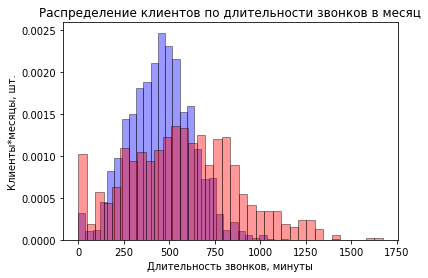

In [129]:
sns.distplot(smart['duration'], hist=True, kde=False, norm_hist = True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot(ultra['duration'], hist=True, kde=False, norm_hist = True,
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение клиентов по длительности звонков в месяц')
plt.xlabel('Длительность звонков, минуты')
plt.ylabel('Клиенты*месяцы, шт.')
;

In [130]:
smart['duration'].describe()

count    1857.000000
mean      453.003770
std       176.314672
min         0.000000
25%       332.000000
50%       454.000000
75%       564.000000
max      1435.000000
Name: duration, dtype: float64

In [131]:
ultra['duration'].describe()

count     823.000000
mean      572.928311
std       307.242082
min         0.000000
25%       346.500000
50%       565.000000
75%       779.000000
max      1673.000000
Name: duration, dtype: float64

In [132]:
print(smart['duration'].var())
print(ultra['duration'].var())

31086.863671127885
94397.6968009153


В среднем клиенты на тарифе Смарт общаются 453 минуты со стандартным отклонением в 176 минуты. Как видно из гистограммы, на среднюю влияет то, что часть клиентов не пользуется голосовой связьтю вообще.  
Наибольше количество клиентов подходят в плотную к границе в 500 минут входящих в тариф и естественно многие её переступают.  
Большинство общается от 250 мин до 600 минут в месяц

Клиенты на тарифе Ультра пользуются голосовой связью в среднем 572 минуты в месяц, что лишь не многим больше клиентов тарифа Смарт  
При этом разброс в 1,7 раза выше и нет явных пиков. Значительно большее относительное количество людей не пользуется мобильной связью.  
Те что пользуются в среднем говорят от 250 до 850 минут в месяц  

Можно предположить, что клиенты тарифа смарт следят за использованными минутами и стараются не переступать предоплаченный лимит, а клиенты Ультра спокойно общаются, так как до границы в 3000 минут очень далеко

Редкий клиент  может выбрать лимит в 3000 минут.

Распределение в обоих случаях нормальное


''

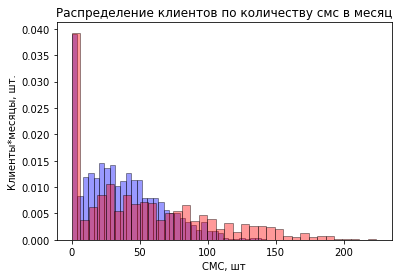

In [133]:
sns.distplot(smart['messages'], hist=True, kde=False, norm_hist = True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot(ultra['messages'], hist=True, kde=False, norm_hist = True,
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение клиентов по количеству смс в месяц')
plt.xlabel('СМС, шт')
plt.ylabel('Клиенты*месяцы, шт.')
;

In [134]:
smart['messages'].describe()

count    1857.000000
mean       36.192246
std        28.730675
min         0.000000
25%        13.000000
50%        31.000000
75%        55.000000
max       143.000000
Name: messages, dtype: float64

In [135]:
ultra['messages'].describe()

count    823.000000
mean      53.017011
std       48.951435
min        0.000000
25%        7.000000
50%       42.000000
75%       83.000000
max      224.000000
Name: messages, dtype: float64

In [136]:
print(smart['messages'].var())
print(ultra['messages'].var())

825.4517070776003
2396.243019278469


In [147]:
df.pivot_table(index='tariff',  
                 values=['duration', 'mb_used', 'messages'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

Очень многие клиенты на обоих тарифах никогда не отправляют СМС сообщения, видимо этот сервис уходит в прошлое  
Клиенты Смарт отправляют  в среднем 36 смс в месяц со стандартным отлонением 29. Распределение смещено вправо
Клиеты Ультра опять сильно отличаются разнообразием, в среднем отправляют 53  сообщения в месяц, при этом стандартное отклонение, которое характеризует разброс, опять в 1,7 раз выше

''

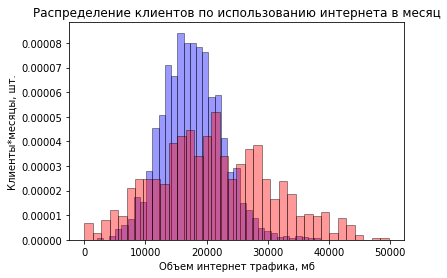

In [137]:
sns.distplot(smart['mb_used'], hist=True, kde=False, norm_hist = True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot(ultra['mb_used'], hist=True, kde=False, norm_hist = True,
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение клиентов по использованию интернета в месяц')
plt.xlabel('Объем интернет трафика, мб')
plt.ylabel('Клиенты*месяцы, шт.')
;

In [138]:
smart['mb_used'].describe()

count     1857.000000
mean     17573.408724
std       4903.668562
min       2003.000000
25%      14170.000000
50%      17341.000000
75%      20723.000000
max      38610.000000
Name: mb_used, dtype: float64

In [139]:
ultra['mb_used'].describe()

count      823.000000
mean     21214.109356
std       9478.163993
min          0.000000
25%      14510.500000
50%      20808.000000
75%      27770.500000
max      49789.000000
Name: mb_used, dtype: float64

In [140]:
print(smart['mb_used'].var())
print(ultra['mb_used'].var())

24045965.364643686
89835592.68632355


Клиенты Смарт в среднем тратят 17 гб трафика в месяц с отклонением в 5 гб, любопытно, что пик потребления интернета выше 15 гб входящих в тариф, большое количество пользователей доплачивают за мб интернета. 
Большинство клиентов Смарт используют от 11 до 24 гб интернета в месяц

Клиенты Ультра в среднем тратят 21 гб трафика в месяц, что ненамного больше, при этом разброс 9 гб уже в 1,9 раза выше, чем у клиентов Смарт  
Есть заметный пик потребления в 21 гб в месяц, но опять же распределение более широкое


### Вывод

СМС не самый популярный сервис, им уже почти перестали пользоваться.

Клиенты с тарифом Ультра потребляют на 30% больше услуг клиентов Смарт, при этом среди них  разброс значений выше в 1,7 раза, то есть меньшее количество клиентов более разнообразно пользуется услугами Мегалайна

Можно предположить, что некоторые из них по умолчанию выбирают дорогой тариф, чтобы не заботится о минутах и мегабайтах, при этом очень неактивно пользуются услугами и им хватило бы тарифа смарт.  

Наличие таких клиентов выгодно

## Проверка гипотез и пояснения

Сформулируем нулевую гипотезу Н0: средняя выручка пользователей тарифов «Ультра» равна средней выручка пользователей тарифов «Смарт»

Альтернативная гипотеза Н1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Построим распределение на предположении, что гипотеза H₀ верна  
Пороговое значение alpha зададим 0.01, так как установление тарифной линейки - это критически важная часть бизнеса телеком оператора, необходимо снизить вероятность получить ошибку

In [141]:
alpha = 0.01

In [142]:
results = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var = False)
results.pvalue

2.4770163088172967e-191

In [143]:
alpha / results.pvalue

4.037115122901516e+188

Уровень pvalue меньше заданного альфа, что не оставляет нам выбора, кроме как отвергнуть нулевую гипотезу и признать:

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Вероятность того, что мы совершили ошибку 1 го рода 4 * 10 в степени -188
С такими надежными данными отвергают гипотезы даже физики теоретики после экспериментов на коллайдере.

Проверим гипотезу о различии средней выручки пользователей из Москвы и выручки пользователей из других регионов

Сформулируем нулевую гипотезу Н0: средние выручки пользователей из Москвы и из других регионов равны

Альтернативная гипотеза Н1: средние выручки пользователей из Москвы и из других регионов отличаются

In [144]:
alpha = 0.01

In [145]:
results_general = (st.ttest_ind(df[df['city'] == 'Москва']['revenue'],
                                df[df['city'] != 'Москва']['revenue'],
                                equal_var = False)
                  )
results_general.pvalue

0.3290527027952159

In [146]:
alpha / results_general.pvalue

0.030390268534653073

Мы не можем отвергнуть нулевую гипотезу, pvalue занчительно выше нашего уровня значимости и говорит скорее о случайном отклонении выборочных средних.

Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

## Общий вывод

   Первоначально у нас было в распоряжении 5 таблиц с данными о 500 клиентах из разных регионов России, их звонках, использовании интернета, сообщениях и тарифах.  
 
   Мы изменили тип данных в столбцах с датой. 

   Проанализировали и приняли решение не оставить звонки с нулевой длительностью нулями.

   Мы сгруппировали все данные по месяцам и по клиентам, для того, чтобы их можно было объединить в сводную таблицу для дальнейшего анализа.  

   Получили суммарные данные по каждому клиенту о количестве и длительности его звонков, использованном трафике и смс.  
   
   После объединения таблицы посчитали ежемесячную выручку по каждому клиенту.   
   
   Пропущенные значения в новой таблице заменили нулями.   
   
   Удалили данные о звонках за неполные месяцы.
   
   Проанализироваили данные получили следующие выводы:
   
- СМС не самый популярный сервис, им уже почти перестали пользоваться.
- Клиенты с тарифом Ультра потребляют на 30% больше услуг клиентов Смарт, при этом среди них  разброс значений выше в 1,7 раза, то есть меньшее количество Ультра клиентов более разнообразно пользуется услугами Мегалайна, чем клиенты Смарт
- Можно предположить, что некоторые из них по умолчанию выбирают дорогой тариф, чтобы не заботится о минутах и мегабайтах, при этом очень неактивно пользуются услугами и им хватило бы тарифа смарт.  
Наличие таких клиентов выгодно

Далее мы выяснили, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, с высоким уровнем значимости

При этом средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов

Разница на уровне статистической погрешности
